In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [15]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [16]:
df.shape

(11251, 15)

In [17]:
df.head(15)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [19]:
# Dropping empty and irrelevant columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

# Checking missing values
df.isnull().sum()


,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [20]:
# Removing rows with missing Amount values
df.dropna(inplace=True)

df.shape


(11239, 13)

In [21]:
# Statistical summary of numerical columns
df.describe ()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


Initial Exploratory Analysis (Basic Overview)


In [22]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


Female customers generate higher total sales compared to male customers.

In [23]:
df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


The age group 26–35 contributes the highest total revenue.


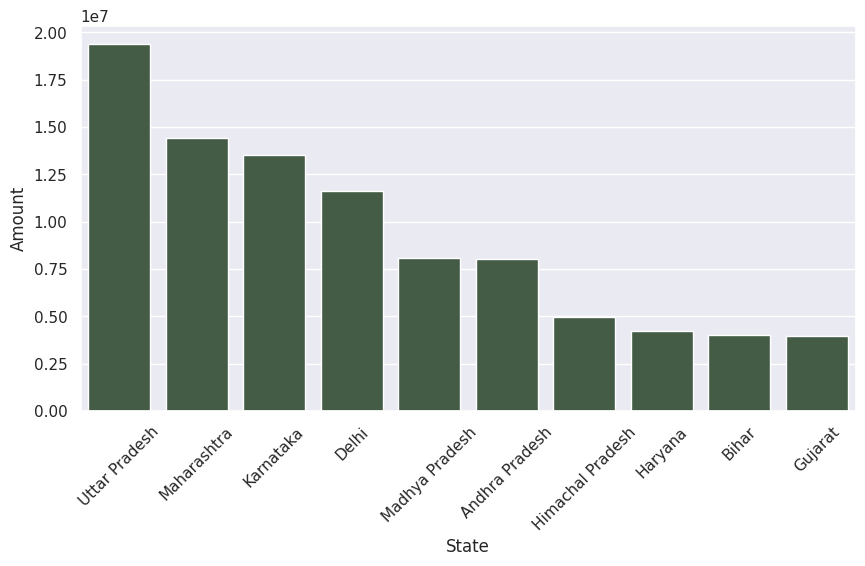

In [24]:
sales_state = df.groupby(['State' ], as_index=False) ['Amount' ]. sum() . sort_values(by='Amount', ascending=False).head(10)
sb.set(rc={'figure.figsize':(10,5)})
sb.barplot(data = sales_state, x = 'State',y= 'Amount'  , color="#406042"
)
plt.xticks(rotation=45)
plt.show()

A small number of states contribute a large portion of total revenue.


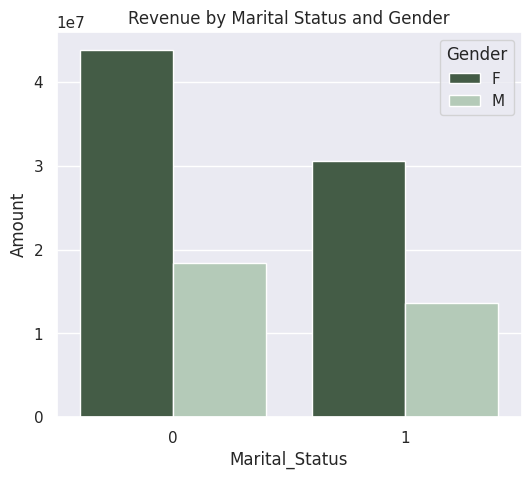

In [34]:

sb.set(rc={'figure.figsize': (6,5)})

sb.barplot(
    data=sales_state,
    x='Marital_Status',
    y='Amount',
    hue='Gender',
    palette=["#406042", "#b0ceb5"]
)

plt.title('Revenue by Marital Status and Gender')
plt.show()


Married women represent the highest contributing segment in terms of revenue.


In [26]:
# Create Average Order Value
df['Avg_Order_Value'] = df['Amount'] / df['Orders']

df[['Amount', 'Orders', 'Avg_Order_Value']].head()


,Amount,Orders,Avg_Order_Value
0,23952.0,1,23952.000000
1,23934.0,3,7978.000000
2,23924.0,3,7974.666667
3,23912.0,2,11956.000000
4,23877.0,2,11938.500000


In [27]:
aov_gender = df.groupby('Gender', as_index=False)['Avg_Order_Value'].mean() \
    .sort_values(by='Avg_Order_Value', ascending=False)

aov_gender


,Gender,Avg_Order_Value
1,M,4978.352534
0,F,4948.231839


Although female customers generate higher total sales, male customers show a higher
average order value, indicating larger purchases per order.


In [28]:
aov_age = df.groupby('Age Group', as_index=False)['Avg_Order_Value'].mean() \
    .sort_values(by='Avg_Order_Value', ascending=False)

aov_age


,Age Group,Avg_Order_Value
4,46-50,5280.741862
5,51-55,5118.522992
0,0-17,5050.503378
3,36-45,5018.283963
6,55+,4946.735948
2,26-35,4864.853349
1,18-25,4854.288939


Customers aged 26–35 combine both high spending power and strong revenue contribution,
making them the most valuable segment.


In [29]:
state_perf = df.groupby('State', as_index=False).agg({
    'Orders': 'sum',
    'Amount': 'sum'
}).sort_values(by='Amount', ascending=False).head(10)

state_perf


,State,Orders,Amount
14,Uttar Pradesh,4807,19374968.00
10,Maharashtra,3810,14427543.00
7,Karnataka,3240,13523540.00
2,Delhi,2740,11603819.45
9,Madhya Pradesh,2252,8101142.00
0,Andhra Pradesh,2051,8037146.99
5,Himachal Pradesh,1568,4963368.00
4,Haryana,1109,4220175.00
1,Bihar,1062,4022757.00
3,Gujarat,1066,3946082.00


High-revenue states do not always correspond to the highest number of orders,
indicating differences in average spending per order across states.


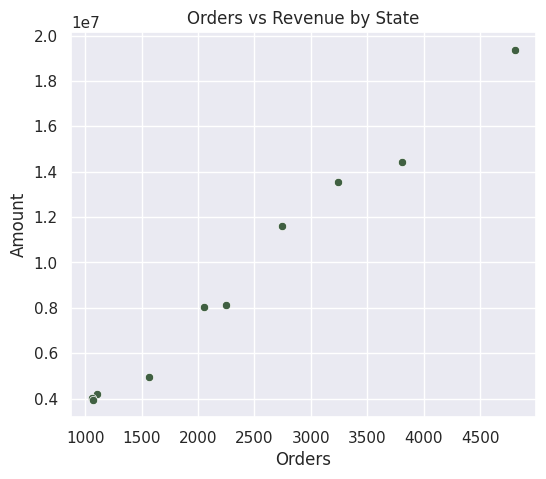

In [33]:
sb.scatterplot(data=state_perf, x='Orders', y='Amount', color="#406042")
plt.title('Orders vs Revenue by State')
plt.show()


In [31]:
customer_rev = df.groupby('User_ID', as_index=False)['Amount'].sum() \
    .sort_values(by='Amount', ascending=False)

customer_rev['Cumulative_Revenue'] = customer_rev['Amount'].cumsum()
customer_rev['Cumulative_Percentage'] = (
    customer_rev['Cumulative_Revenue'] / customer_rev['Amount'].sum()
)

customer_rev.head()


,User_ID,Amount,Cumulative_Revenue,Cumulative_Percentage
1045,1001680,281034.0,281034.0,0.002645
1197,1001941,239147.0,520181.0,0.004896
2134,1003476,220435.0,740616.0,0.006971
1628,1002665,201104.0,941720.0,0.008863
2355,1003808,197660.0,1139380.0,0.010724


Pareto analysis shows that a small percentage of customers contributes to a large
portion of total revenue, highlighting the importance of retaining high-value customers.


Conclusion:
This analysis identified high-value customer segments and regions that drive Diwali sales.
Focusing on customer value rather than volume provides deeper business insights and supports
more effective marketing and inventory strategies.
